# Analytical solution to a 1D FLD problem

Credit for providing the solution and the setup goes to Alex Ziampras. Thanks, Alex!

$$\Sigma c_v \frac{\partial T}{\partial t} = -\nabla\cdot\vec{F}, \qquad \vec{F} = -\lambda\frac{16\sigma T^3}{\kappa\rho} \nabla T$$

$$\nabla\cdot\vec{F} = 0 \Rightarrow \nabla \cdot \left[\frac{T^3}{\rho} \nabla T\right] = 0$$

cylindrical: $$\frac{1}{R}\frac{\partial}{\partial R}\left(\frac{T^3 H}{\Sigma} R \frac{\partial T}{\partial R}\right) = 0\qquad(\rho\propto \Sigma/H)$$

$H\propto \sqrt{R^3 T}$, $\Sigma\propto R^{-1/2}$:
$$\frac{\partial}{\partial R}\left(\frac{T^3 R^{3/2} T^{1/2}}{R^{-1/2}} R \frac{\partial T}{\partial R}\right) = 0$$

$$\frac{\partial}{\partial R}\left(T^{7/2} R^3 \frac{\partial T}{\partial R}\right) = 0$$

$$T^{7/2} R^3 \frac{\partial T}{\partial R} = c_1$$

$$T^{7/2} dT = c_1 \frac{dR}{R^3}$$

$$T^{9/2} = c_1 \frac{1}{R^2} + c_2$$

$$T = \left(c_1 R^{-2} + c_2\right)^{2/9}$$

$T(R_\min) = T_\min$, $T(R_\max) = T_\max$

define $T_1 = T_\min^{9/2}$, $T_2 = T_\max^{9/2}$, $R_1 = R_\min^{-2}$, $R_2 = R_\max^{-2}$

then $$c_1 = \frac{T_2 - T_1}{R_2-R_1}\qquad c_2 = \frac{R_2 T_1 - R_1 T_2}{R_2-R_1}$$

In [17]:
import numpy as np

Rmin, Rmax = 0.2, 10
mu = 2.353
K = 106701.29 # code unit for temperature
T0 = mu * 0.05**2 * K

R = np.geomspace(Rmin, Rmax, 1000)

f1, f2 = -3.5, 5 # old module
# f1, f2 = -2, 9/2 # new module

R1 = Rmin ** f1
R2 = Rmax ** f1
T1 = (T0 / Rmin)**f2
T2 = (T0 / Rmax)**f2
c1 = (T2-T1) / (R2-R1)
c2 = (R2*T1 - R1*T2) / (R2-R1)
T = (c1 * R ** f1 + c2) ** (1/f2)

from types import SimpleNamespace

theo = SimpleNamespace()
theo.R = R
theo.T = T
theo.T0 = T0

## Plot data

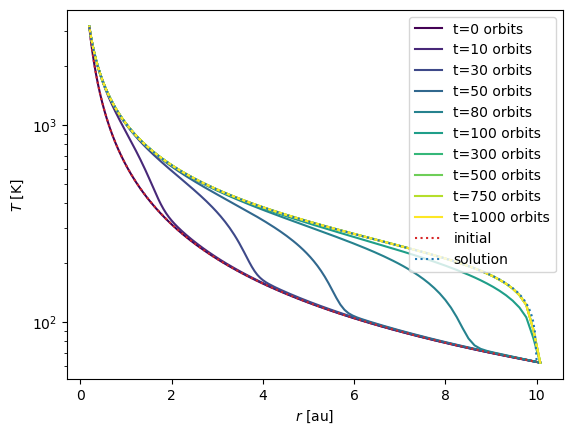

In [20]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=100)

from disgrid import Data
d = Data("output/out")

name = "energy"
dataunit = "J/cm2"

Nfirst = d.avail()["Nfirst"]
Nlast = d.avail()["Nlast"]

Tunit = 1.0670018430261180e+05

field = d.get(dim="2d", var=name, N=0)
grid = field.grid
Nr = len(grid.get_centers("r"))
Nphi = len(grid.get_centers("phi"))
T = np.fromfile(d.path+"/snapshots/0/Temperature.dat", dtype=np.float64).reshape(Nr, Nphi)*Tunit
profile0 = np.average(T, axis=1)

cmap = plt.cm.get_cmap("viridis")

inds = np.linspace(Nfirst, Nlast, 10, dtype=int)
inds = [0, 1, 3, 5, 8, 10, 30, 50, 75, 100]
for k, n in enumerate(inds):
    color = cmap(k/(len(inds)-1))
    
    field = d.get(dim="2d", var=name, N=n)
    T = np.fromfile(d.path+f"/snapshots/{n}/Temperature.dat", dtype=np.float64).reshape(Nr, Nphi)*Tunit

    r = grid.get_centers("r").to_value("au")
    Z = T

    
    y = np.average(Z, axis=1)
    
    t = field.time.to_value("yr")/1**1.5
    # ax.plot(r, (profile-profile0)/profile0, label=f"t={t:.3f}yr")
    line, = ax.plot(r, y, label=f"t={t:.0f} orbits", color=color)


### Plot theoretical data

ax.plot(theo.R, theo.T0 / theo.R, ls=":", label='initial', color="tab:red")
ax.plot(theo.R, theo.T, ls=":", label='solution')


ax.legend()

ax.set_yscale('log')
ax.set_ylabel('$T$ [K]')
ax.set_xlabel('$r$ [au]')
plt.show()

Could also plot radiative flux  $F_\text{rad} \propto \frac{T^3}{\rho} \nabla T$, this should be constant

Should be done within 2000 orbits at r=1

Kolb 2023 paper for the dynamic test